*Keep in mind while writing up:*

- *Be concise! Less is more - the fully story is in the source code for those interested.*
- *Be deliberate about: What to highlight in which section (e.g., “this dataset was special due to its high number of variables”…)*
- *Work with visuals and only exceptionally with code. Refer to GitHub, dump code there, the technical people will go there. And (hiring) managers will only read the write-up.*
- *Optimize business value, not model performance! Time/Resource constraints, ….*

### Project Report
# **Preventing Customer Churn with Artificial Neural Networks**
*Disclaimer: This mock project report serves educational purposes only. The data used is public (https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data). All other company information is fictional. The author has no relationship with mentioned parties.* 
***
### **Executive Summary (max. 7 sentences)**
Situation (1 sentence based on 1.)
<br>
Complication (1 sentence based on 1.)
<br>
Solution (1 sentence based on 2.)
<br>
Recommendations including Solutions' Business Value Add (1-3 sentences based on 3.)
"much buzz around ANN, let's test that here"
***
### **Report Structure**
[Include nice + simple process visualization!]
1. Business Problem Statement
2. Technical Solution
<br>    *2.1. Technical Problem Statement*
<br>    *2.2. Exploratory Data Analysis*
<br>    *2.3. Data Preprocessing*
<br>    *2.4. Model Selection (incl. Optimization)*
<br>    *2.5. Final Model Evaluation*
<br>    *2.6. Future Optimization Potentials*
3. Business Recommendations
***

## **1. Business Problem Statement**
For French telecommunication provider Orange, customer retention is critical. This is because retaining customers is much cheaper than the alternative: losing a customer and their revenues *plus* having additional costs for acquiring a new customer. However, Orange lacks an automated, scalable, and data-driven method for predicting customer churn that would allow Orange to initiate retention measures before customers leave. That is, predicting customer churn currently more or less relies on sporadic guessing. Thus, Orange requested a proof-of-concept for a predictive model that can help identify customers who will likely churn. Specifically, given the enthusiastic debate around this model class, Orange wants the proof-of-concept to explore the potential of "deep learning".

<br>

## **2. Technical Solution**
- for visualization inspirations see here: https://towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac


### *2.1. Technical Solution: Technical Problem Statement*
The business problem, as put by our client Orange, is "to predict customer churn". This problem requires translation into a better specified, technical problem in order to be solvable using mathematical-statistical methods. Technically put, our problem is to

*maximize the F1-score over the churn predictions of Orange's customers by implementing an artificial neural network with more than one hidden layer and an output layer containing a single neuron with an activation function*.

(TO-DO: F1 bei churn quote und random guessng ermitteln - benchmark for improvement/business value add)

Each component of this technical problem statement follows from considering the following three issues in light of the business problem we solve: 

#### Specifying the business problem
It is first important to understand that predicting customer churn is, technically, a binary classification problem: given the data available for any particular customer (e.g., age, gender, purchased services, average call duration), we want our model to assign this customer to one of the two classes "churn"/"no churn". Understanding that we solve a classification problem has important implications for two main elements of the technical problem statement:

#### Choosing adequate model classes
In a typical data science project, we would train models from many different model classes (e.g., logistic regression classifiers, trees, support vector machines) and select the best performing models (or combine them in an *ensemble*) for deployment. In this project, however, the client Orange has specified upfront that they want a "deep learning" model, which in more precise technical terms is widely understood as an artificial neural network (ANN) with more than one hidden layer. Since we want the ANN's output to always be either "churn" or "no churn", its output layer must contain a single neuron with an activation function (e.g., ReLU, sigmoid) that translates continuous into binary values (1/0).

#### Choosing adequate evaluation metrics
An evaluation metric enables us to assess how "good" a developed model is and optimize it. The perhaps most intuitive metric for a classification model is the *accuracy* of its predictions. Accuracy tells us in which percentage of cases a classification model's predictions ("churn"/"no churn") are true (that is, correctly predict what customers will actually do). However, we can infer from the business context that the classes "churn"/"no churn" we are interested in are *imbalanced*: only a minority of all customers will churn in any given time period. We can thus expect many more customers to be in the "no churn" rather than the "churn" class. Accuracy will thus be a bad metric to optimize: the model could 'cheat' and predict "no churn" in 100% of the cases, and never detect a single churning customer, and still have awesome accuracy. In presence of class imbalance, a metric more adequate to optimize is the *F1-score*. A high F1-score indicates not only that the model is able to detect many of those customers who will indeed churn, but also that the model's "churn"-predictions are typically correct (two different things!).   

Resources used:
- Data: Orange has provided historical customer data (50,000 observations/customers; 230 features) for model optimization, selection, and evaluation. 
- Software: Python 3.8.5., main packages:
    - Pandas, Numpy (for data wrangling)
    - Keras/TensorFlow (for neural network modelling)
    - Scikit-learn (for optimization/gridsearch automation)
    - Matplotlib, Seaborn (for visualization)
- Hardware: standard enduser office notebook (i7-8550U; 4 cores @1.80 GHz)

Deliverable:
-  source code in Python that can serve as proof of concept before deploying and putting into production (check vocabulary; for containerization also check this: https://github.com/Azure-Samples/MachineLearningSamples-TDSPUCIAdultIncome/blob/master/docs/deliverable_docs/ProjectReport.md)

<br>

### *2.2. Technical Solution: Exploratory Data Analysis (EDA)*
Now that we better understand which technical problem we solve in this project, we familiarize ourselves with the historical customer data Orange has provided. This exploratory data analysis helps us identify how we need to preprocess the data so that the ANN will be able to best exploit it for churn prediction. This typically involves some basic overall checks (overall dataset structure, feature types, missing values), but also analyses more focused on our target variable, that is, the class label vector "churn"/"no churn" (= what we want to predict).

#### Loading the data

In [159]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("float_format", "{:f}".format)
pd.set_option('display.max_columns', None)

import pandas as pd
X = pd.read_table('data/orange_small_train.data')
y = pd.read_table('data/orange_small_train_churn.labels', header=None, names=['Churn'])
data = pd.concat([X, y], axis=1)

<br>

#### Inspecting the overall dataset structure

Our very first analytical step is to take a broad look at the overall dataset structure, including the number of features (columns) and observations (rows/customers), feature names, features' data types, missing value formatting, and some basic descriptive statistics.

In [104]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.000000,7.000000,NaN,NaN,NaN,NaN,NaN,184.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.000000,580.000000,NaN,14.000000,128.000000,NaN,NaN,166.560000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,3570.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.000000,NaN,1350864.000000,NaN,0.000000,NaN,NaN,7333.110000,NaN,5.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,168.000000,117625.600000,NaN,NaN,NaN,NaN,NaN,1175.000000,NaN,NaN,NaN,6.000000,NaN,720.000000,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1212385.000000,69134.000000,NaN,NaN,NaN,NaN,NaN,185.000000,NaN,NaN,0.000000,9.000000,NaN,NaN,NaN,NaN,397579.000000,NaN,NaN,NaN,1812252.000000,NaN,NaN,NaN,NaN,NaN,NaN,142.000000,NaN,NaN,38418.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.000000,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000000,210.000000,NaN,2.000000,24.000000,NaN,NaN,353.520000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,4764966.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,26,0.000000,NaN,2872928.000000,NaN,3.000000,NaN,NaN,151098.900000,NaN,25.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,40.000000,-356411.600000,NaN,NaN,NaN,NaN,NaN,590.000000,NaN,NaN,NaN,72.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,4136430.000000,357038.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,9.000000,NaN,NaN,NaN,NaN,278334.000000,NaN,NaN,NaN,10439160.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,238572.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,Na

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


In [107]:
X.describe(include='all')

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1487.000000,44471.000000,44461.000000,0.000000,702.000000,1487.000000,1240.000000,558.000000,44461.000000,1240.000000,0.000000,1487.000000,1579.000000,1579.000000,1579.000000,0.000000,44471.000000,44991.000000,1487.000000,42770.000000,44991.000000,1487.000000,1487.000000,44989.000000,702.000000,702.000000,0.000000,0.000000,847.000000,1241.000000,44991.000000,1241.000000,1579.000000,44991.000000,0.000000,1241.000000,702.000000,0.000000,1241.000000,44991.000000,344.000000,1241.000000,702.000000,0.000000,1241.000000,702.000000,3747.000000,0.000000,702.000000,1241.000000,0.000000,646.000000,50000.000000,702.000000,820.000000,1487.000000,847.000000,558.000000,694.000000,238.000000,44461.000000,694.000000,1487.000000,1241.000000,1487.000000,1487.000000,1129.000000,27620.000000,50000.000000,44461.000000,1241.000000,44991.000000,702.000000,44991.000000,0.000000,1487.000000,44471.000000,1579.000000,44991.000000,1240.000000,44991.000000,702.000000,702.000000,1083.000000,646.000000,702.000000,1129.000000,171.000000,1487.000000,27620.000000,1241.000000,1241.000000,1487.000000,558.000000,1579.000000,702.000000,873.000000,451.000000,1487.000000,820.000000,820.000000,1579.000000,1487.000000,702.000000,42770.000000,702.000000,1129.000000,44991.000000,50000.000000,1241.000000,820.000000,702.000000,1579.000000,171.000000,44471.000000,1487.000000,702.000000,1241.000000,44991.000000,1579.000000,44461.000000,36080.000000,1083.000000,1083.000000,702.000000,1240.000000,702.000000,44991.000000,44991.000000,44991.000000,1579.000000,694.000000,702.000000,1579.000000,1487.000000,44461.000000,0.000000,702.000000,44991.000000,44471.000000,1579.000000,1487.000000,1487.000000,1487.000000,42770.000000,1579.000000,847.000000,1579.000000,44991.000000,702.000000,1579.000000,694.000000,1129.000000,873.000000,1241.000000,44991.000000,1579.000000,1241.000000,44991.000000,1579.000000,873.000000,1487.000000,0.000000,702.000000,0.000000,1241.000000,1083.000000,1487.000000,44991.000000,1579.000000,0.000000,1240.000000,1241.000000,646.000000,1579.000000,702.000000,44991.000000,1579.000000,1241.000000,1241.000000,0.000000,702.000000,702.000000,1241.000000,21022.000000,333.000000,1083,49631,50000,12784,50000,50000,49857,50000,49996,24592,12783,49999,49857,50000,48066,44471,50000,49857,0.000000,50000,50000,50000,1129,24592,694,50000,49297,49297,44789,50000,50000,50000,44789,820,23856,50000,50000,50000,21568,0.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN

<br>

#### Inspecting missing values

Since we discover that the data contains missing values ("NaN"), we want to know precisely which percentage of values is missing in the data we have been given, and also how these missing values are distributed across features.

In [108]:
round(X.isna().sum().sum()/(X.shape[0]*X.shape[1]), 3)

0.698

<BarContainer object of 230 artists>

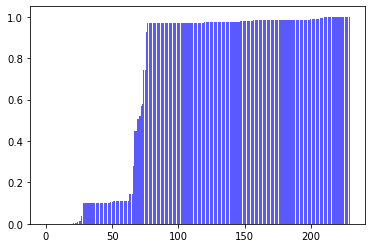

In [109]:
import matplotlib.pyplot as plt
temp = X.isna().sum()/(X.shape[0])
plt.bar(range(len(temp)), sorted(temp), color='blue', alpha=0.65)

<br>

#### Checking class balance "churn"/"no churn"

Having acquired an overall impression of the data, we now take a more focused look on our target variable 'Churn', that is, the column containing the class labels our model will need to predict.  

(array([46328.,     0.,  3672.]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <BarContainer object of 3 artists>)

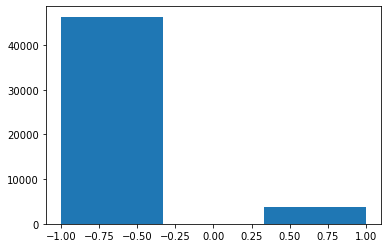

In [84]:
plt.hist(y['Churn'], bins=3)

In [25]:
y['Churn'].value_counts()

-1    46328
 1     3672
Name: Churn, dtype: int64

<br>

#### > EDA key insights:
To summarize, our brief exploratory analysis helped us gain some important insights about the features, observations, and target variable in our data. We will need to keep these insights at the back of our mind during, as they will tell us how to properly preprocess the data so that our predictive model can best make use of it. We have learned that:

- Features: 
	- Most or all features' scales differ.
	- Orange has anonymized data before providing it (likely to protect customers' privacy).
	- The 230 total features include 38 categorical and 192 numerical features.
- Observations:
	- We have been given data on 50.000 customers and their churn behaviour that we can use for optimizing and evaluating our model.
	- Missing values are a big issue in this dataset (around 70%).
- Target variable:
	- As expected, the two classes in our target variable 'Churn' are heavily imbalanced (around 1 churning customer for 12 non-churning customers).
	- The class labels "churn"/"no churn" are represented by the numerical values 1/-1. 


<br>

### *2.3. Technical Solution: Data Preprocessing*
Before we the data can be used for effective model training, it needs to be preprocessed. This is because the ANN model we implement requires data to be in a particular format to effectively 'learn' how to make good predictions. In addition, since preprocessing steps often have interdependencies, performing them in the right order is important - otherwise we risk messing up the data used for model training, and thus our model. 

Some main preprocessing steps that we infer from our learnings during EDA to help improve prediction quality is to remove missing value-intensive observations and features, encode (= 'make numerical') categorical features, create binary indicator columns for missing values, impute missing values, transform the class labels, and normalize the features' scales.

#### Remove missing value-intensive observations and features
EDA has shown that a big issue in the data is the high number of missing values. Observations (rows) and features (columns) with many or even all values missing will increase model training time and model complexity (even further exacerbating ANNs' general tendency to overfit), but possess not much information which can be exploited in model training. In other words, keeping these rows and columns in will be a bad deal for us. We thus remove all observatons which might have only missing values...

In [160]:
X.dropna(axis=0, how='all', inplace=True)

... and all features which have more than 80% missing values.

In [161]:
X.dropna(axis=1, inplace=True, thresh=X.shape[0] * 0.2)

We can look once more at the earlier graph to see that the remaining features contain much more information per feature. This will much help our model during training to focus on what's important. 

<BarContainer object of 76 artists>

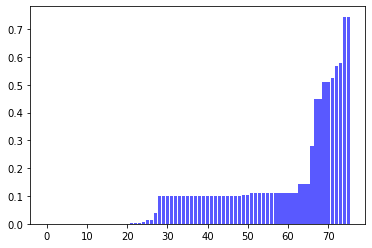

In [136]:
temp = X.isna().sum()/(X.shape[0])
plt.bar(range(len(temp)), sorted(temp), color='blue', alpha=0.65)

#### Encoding categorical features
We have also learned during EDA that there are quite some categorical features. Our ANN model (like many other model classes), however, can only handle numerical inputs. We thus *one-hot encode* the categorical features. This means that for each unique value in each categorical feature, we create an additional feature which indicates via the values 1 or 0 for each observation the presence of absence of that unqiue value.

However, since we have an average number of X unique values per categorical feature, regular one-hot encoding would explode the number of features, making our data high-dimensional. This is undesirable for a variety of reasons (see *curse of dimensionality*). To keep dimensionality at bay, we thus modify one-hot encoding: we do not add an additional feature for *each* unique value in a categorical feature, but only the 20 *most frequent* unique values. At the end, we drop the categorical feature.

In [162]:
features_cat = list(X.select_dtypes('object').columns)

for iteration, clm in enumerate(features_cat):
    most_freq_vals = X[clm].value_counts()[:20].index.tolist()
    dummy_clms = pd.get_dummies(X[clm].loc[X[clm].isin(most_freq_vals)], prefix=clm)
    X = pd.merge(
        X,
        dummy_clms,
        left_index=True,
        right_index=True,
        how='outer')
    for dum_clm in X[dummy_clms.columns]:
        X[dum_clm].fillna(0, inplace=True)
    X.drop(clm, axis=1, inplace=True)

This preprocessing step adds 414 features (net), leaving us with 490 total features - all numerical.

In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 490 entries, Var6 to Var229_sk2h
dtypes: float64(449), int64(1), uint8(40)
memory usage: 174.0 MB


#### Adding missing value indicator features
We now return once more to the issue of missing values. Since the number of missing values in the data is so high, we want to think some more about how we might exploit that. While a missing value represents an absence of information, the very fact per se that a value is missing might indicate something (e.g., a customer not booking a particular service) and possess predictive power. Thus, for each feature with missing values, we create an additional feature which indicates via the values 1 or 0 for each observation the presence or absence of a missing value.

In [163]:
import numpy as np
for clm in X:
    if X[clm].isna().sum() > 0:
        X.insert(X.shape[1], f"{clm}_NaNInd", 0)
        X[f"{clm}_NaNInd"] = np.where(np.isnan(X[clm]), 1, 0)

This preprocessing step adds 115 features, leaving us with 529 total features.

In [164]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 529 entries, Var6 to Var189_NaNInd
dtypes: float64(449), int32(39), int64(1), uint8(40)
memory usage: 181.4 MB


#### Imputing missing values
To add at least some meaningful information to the data where values are missing, we impute missing values with feature-wise medians. (Alternatives we have tried that did not result in better model performance, all feature-wise: mean, mode, minimum, maximum, missing value count).

In [165]:
X.fillna(X.median(), inplace=True)

As we can see, our data now does not contain any missing values anymore:

In [166]:
round(X.isna().sum().sum()/(X.shape[0]*X.shape[1]), 3)

0.0

#### Transforming class labels
We also bring the class labels into a more intuitive form.

In [167]:
y['Churn'] = (y['Churn'] + 1) / 2
y.value_counts()

Churn   
0.000000    46328
1.000000     3672
dtype: int64

#### Normalizing feature scales
Finally, we rescale the features. We have seen in EDA that the features were measured using different scales. To rule out that this could affect our model, we will MinMax-scale all features in the data (except the indicator columns we added). that is, rescale their minimum to 0 and maximum to 1. (Alternative procedures we have tried that did not result in better model performance: Scitkit-learn's RobustScaler, PowerTransformer. The fact that RobustScaler did not improve model performance also suggest that outlier removal will not matter much, and thus not be worth to invest time in.)

However, before we do this, it is important to put aside a part of the data. This 'test data' simulates new customer data that is incoming later when our model is productionized. We will talk more about why this step needs to be done in a second.

In [175]:
X.shape

(50000, 529)

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X.iloc[:, 177]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
49995   0.000000
49996   0.000000
49997   0.000000
49998   0.000000
49999   0.000000
Name: Var200_NDkZGt8, Length: 50000, dtype: float64

### *2.4. Technical Solution: Model Selection (incl. Optimization)*
(Model Choice, Training, Validation, Optimization)
split dataset, choose/apply model, compile/train models, optimize model (gridsearch, cross-validation, stratified y/n, ...)

#### Splitting data into training and test data
how is this step advisable given EDA
what does it mean
what are its expected positive effects
Alternatives we have tried that did not result in better model performance:

test set size 20%

clarify: logik hinter training/test/validation split erklären; dann wo passiert was hier im code

eingehen auf tatsache, dass ich auch test data preprocessed habe - warum ist das valide gegeben der ttatsache, dass die testdaten neue, ungesehen Daten simulieren sollen


pick best model that comes out of gridsearch and train on entire dataset (while during gridsearch has been trained only on fraction while validation data had been held out)

- specify neural network as "Feed-forward neural network" - why not recurrent, LSTM that can loop/have memory -given goal in this project is to probe the hypoe around "deep learning", unnecessary complexity
- in write-up: reflect on fact neural networks / deep learning seem to be overhyped
- see e.g.: Peter Roßbach: "Neural Networks vs. Random Forests – Does it always have to be Deep Learning?
- - make that explicit point of the write-up! "test" that!
- show here that I know how to work with learning curves
- addressing class imbalance: work with class weight, alternative would have been resampling the data, but tried got similar model performance, while taking significant additional computing time

when looking at results, come back to earlier point, explain via clas imbalance
come back to earlier point: 
- make it one main technical point in the article that high accuracy can be misleading (when? why?) - have to also check other measures
- - includein write-up my reflections for using precision/recall instead of AUC (argue by importance to detect minority class relative to importance of TPs and FPs) (expl in simple language)

### *2.5. Technical Solution: Final Model Evaluation*
Model Evaluation on 'Unseen' Data (simulate by priorly held out 'Test Data')
- Do the results make sense?

- show/compare how accuracy can be misleading


- feature importance chart

### *2.6. Technical Solution: Future Optimization Potentials*
(hier sammeln alles ich zeitlich nicht geschafft hab, aber für wichtig halte - um Kritik zu preempten)

Schema: Potential - Umsetzungsaufwand - erwarteter Umsetzungseffekt auf Business Metric

- version 2: optimization potentials (versus v1) to explore ceteris paribus:
- not explored/limitations: only individually optimized, due to constraints in processing power and time, optimization dependencies between variables neglected
- only narrow ranges in gridsearch covered, so sound change that only found local optima per parameter
- potential: NaN imputation with means on subsets of rows: one could search powerful clustering criteria first and than impute cluster means
- also: was using smaller dataset, large dataset with many more variables may allow to increase a classifier's precision/recall
- Make sure to also compare to others' results - I seem to be already working at the upper boundary of what's possible on this dataset with ANNs!
- optimization potential: in practice, one would normally traing many different models and select/stack the best; show somehow that I'm aware of that
- (optimization potential: add and compare AUC: simple logistic regression, random forest, 'flat' neural network, XGBoost)
- optimization potential: put data into an AWS instance and run there
- multicollinearity - check whether an issue - we want to have model as simple as possible! will decrease risk of overfitting that ANNs are especially prone to
- outliers: Scaler Min Max or Robust made no big difference (see model_comparision Excel), suggesting it is not problematic that we have not removed outliers in data preprocessing; still might contain some potential to increase model performance
- feature selection: have touched (selectKBest), but not exhausted feature selection 
- feature engineering: dimensionality reduction to reduce dimensionality, create new and more 'powerful' features; kurz auf curse of dimensionality eingehen und auf ANNs overviffting tendency; feature selection would have benefit to be explanable however, features anonymized anyways
- optimization: "Optimization of only thought about in terms of tuning hyperparamters; but also preprocessing includes many steps that can be done in different ways - meaning also has potential to optimize: read following in conjunction with "diary" to see what I have optimzied here and with which success: <br>

## **3. Business Recommendations**
"What do the generated insights/model urge us/allow us to do different next Monday, and which value (business metric!) will that generate?"

direkt aus auftrag (1.) ableiten. incl.:
- (after implementing comparative models:) "turns out, deep learning (might) not be best for this kind of problem; best practice computer vision, very large datasets; here: tree model such as XGboost or simple logistic regression better 
- based on a feature importance chart for final ANN, identify potential churn drivers: discuss how can be made visible and influenced by which staff groups XY (account managers? service managers?); measure, enable and encourage these staff groups to act on identified drivers  

Good Example: https://www.kaggle.com/code/hamzaben/employee-churn-model-w-strategic-retention-plan/notebook